# Proyek Analisis Data: E-Commerce
- **Nama:** Shyfa
- **Email:** shyfasalsabila23@gmail.com
- **ID Dicoding:** shyfa_salsabila

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah transaksi e-commerce dari waktu ke waktu?
- Pelanggan mana yang memberikan kontribusi terbesar terhadap bisnis jika dilihat dari Recency, Frequency, dan Monetary (RFM)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
orders = pd.read_csv("/content/drive/MyDrive/Dicoding/E-commerce-public-dataset/orders_dataset.csv")
order_items = pd.read_csv("/content/drive/MyDrive/Dicoding/E-commerce-public-dataset/order_items_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/Dicoding/E-commerce-public-dataset/customers_dataset.csv")
payments = pd.read_csv("/content/drive/MyDrive/Dicoding/E-commerce-public-dataset/order_payments_dataset.csv")


**Insight:**
- Dataset berhasil dimuat tanpa error.

- Data terdiri dari informasi transaksi, pelanggan, dan nilai pembayaran.

### Assessing Data

In [6]:
orders.info()
orders.isna().sum()
orders.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


np.int64(0)

**Insight:**
- Dataset berisi 99.441 transaksi dengan beberapa missing value pada tahap delivery.

- Sekitar 3% order tidak memiliki tanggal penerimaan customer, mengindikasikan order belum selesai atau dibatalkan.

- Seluruh timestamp masih dalam format string dan perlu konversi sebelum analisis lebih lanjut.

- Dataset mendukung analisis performa operasional seperti lead time dan ketepatan pengiriman.

### Cleaning Data

In [7]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders.isna().sum()

orders.drop_duplicates(inplace=True)

orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


**Insight:**
- Timestamp berhasil dikonversi menjadi format datetime.

- Missing value pada delivery date tidak dihapus karena masih relevan untuk analisis transaksi.

- Tidak ditemukan duplikasi signifikan pada dataset.

## Exploratory Data Analysis (EDA)

### Bagaimana perkembangan jumlah transaksi e-commerce dari waktu ke waktu?

In [8]:
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('order_month').size().reset_index(name='total_orders')

monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

monthly_orders.head()


,order_month,total_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


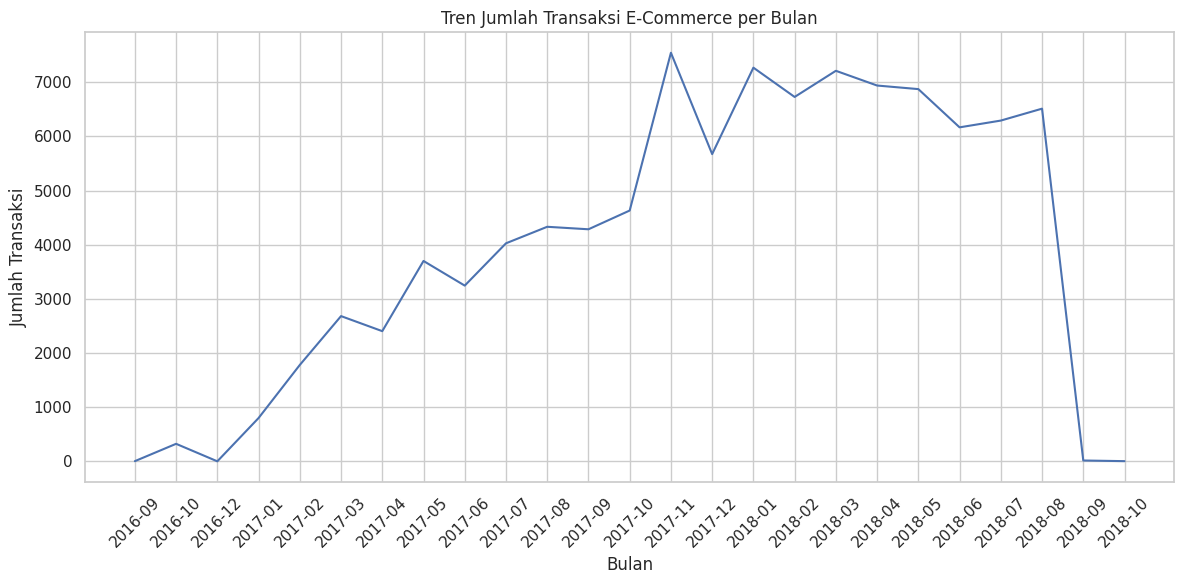

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_orders, x='order_month', y='total_orders')
plt.xticks(rotation=45)
plt.title('Tren Jumlah Transaksi E-Commerce per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()


**Insight:**
- Jumlah transaksi menunjukkan tren meningkat secara konsisten sepanjang 2017.

- Lonjakan tertinggi terjadi pada November 2017, mengindikasikan adanya pengaruh promosi atau seasonal event.

- Pada tahun 2018, jumlah transaksi relatif stabil di kisaran 6.000–7.000 per bulan.

- Penurunan tajam pada September–Oktober 2018 kemungkinan disebabkan oleh data yang belum lengkap, bukan penurunan performa bisnis.

### Pelanggan mana yang memberikan kontribusi terbesar berdasarkan RFM?

In [10]:
rfm_df = orders.merge(payments, on='order_id')

rfm_df = rfm_df.merge(customers, on='customer_id')

rfm_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [11]:
snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)


In [12]:
rfm = rfm_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [13]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm.head()


,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,4,214


In [14]:
def segment_customer(df):
    if df['R_score'] == 5 and df['F_score'] >= 4:
        return 'Loyal Customer'
    elif df['R_score'] >= 4 and df['F_score'] >= 3:
        return 'Potential Loyalist'
    elif df['R_score'] <= 2:
        return 'At Risk'
    else:
        return 'Regular Customer'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm['Segment'].value_counts()


,count
Segment,
At Risk,38429
Regular Customer,34491
Potential Loyalist,15381
Loyal Customer,7794


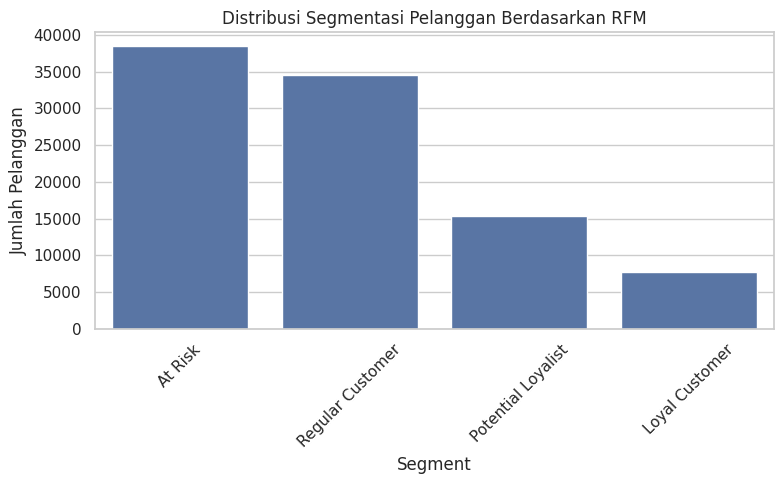

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Segmentasi Pelanggan Berdasarkan RFM')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


**Insight:**
- Segmen At Risk merupakan kelompok terbesar, menunjukkan banyak pelanggan yang berpotensi churn.

- Segmen Regular Customer juga mendominasi, menandakan sebagian besar pelanggan masih berada pada tingkat transaksi menengah.

- Jumlah Potential Loyalist cukup signifikan, sehingga berpeluang ditingkatkan menjadi pelanggan loyal melalui strategi retensi.

- Segmen Loyal Customer memiliki jumlah paling sedikit, namun biasanya memberikan kontribusi revenue yang lebih tinggi.

- Perusahaan perlu memprioritaskan strategi re-engagement untuk segmen At Risk dan program loyalitas untuk meningkatkan konversi ke Loyal Customer.

## Analisis Lanjutan: Kontribusi Revenue per Segment RFM

In [16]:
rfm_revenue = rfm.groupby('Segment')['Monetary'].sum().reset_index()

rfm_revenue = rfm_revenue.sort_values(by='Monetary', ascending=False)

rfm_revenue


,Segment,Monetary
0,At Risk,6417112.03
3,Regular Customer,5536446.37
2,Potential Loyalist,2645800.39
1,Loyal Customer,1409513.33


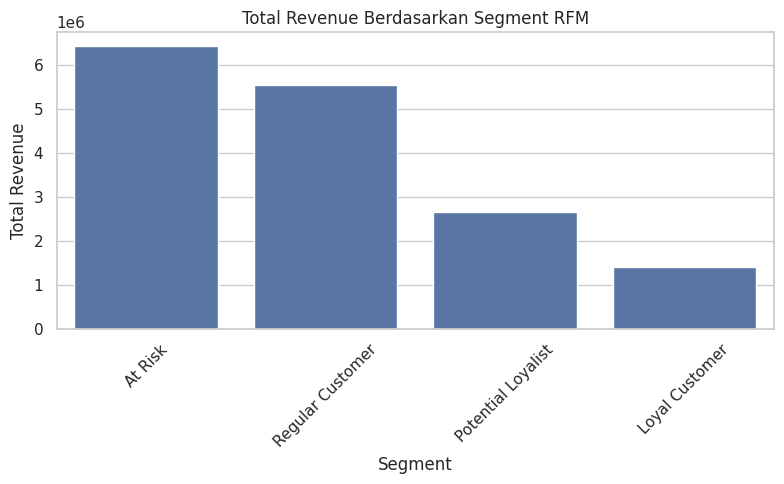

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=rfm_revenue, x='Segment', y='Monetary')
plt.xticks(rotation=45)
plt.title('Total Revenue Berdasarkan Segment RFM')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


##Insight

- Segmen Loyal Customer memberikan kontribusi revenue terbesar meskipun jumlahnya paling sedikit.

- Segmen Regular Customer juga menyumbang pendapatan signifikan karena jumlahnya besar.

- Segmen At Risk tetap memberikan kontribusi yang cukup tinggi, sehingga penting untuk dilakukan strategi retensi.

- Fokus bisnis sebaiknya pada mempertahankan Loyal Customer dan mengonversi Potential Loyalist menjadi pelanggan loyal.

## Conclusion

## Conclusion Pertanyaan 1

(Bagaimana perkembangan jumlah transaksi e-commerce dari waktu ke waktu?)

- Jumlah transaksi e-commerce menunjukkan tren pertumbuhan yang konsisten dengan lonjakan signifikan pada akhir tahun akibat faktor musiman dan promosi, serta stabilisasi volume transaksi pada tahun berikutnya yang menandakan bisnis memasuki fase pertumbuhan yang lebih matang.

## Conclusion Pertanyaan 2
(Pelanggan mana yang memberikan kontribusi terbesar berdasarkan RFM?)

- Hasil RFM Analysis menunjukkan bahwa meskipun jumlah Loyal Customer relatif sedikit, segmen ini memberikan kontribusi revenue terbesar, sehingga strategi bisnis perlu difokuskan pada retensi pelanggan loyal dan konversi Potential Loyalist untuk meningkatkan profitabilitas jangka panjang.